In [1]:
import numpy
import numpy.linalg as la
from N_Level_Engine_v1 import*
import matplotlib.pyplot as plt

## Power

In [3]:
p_values = np.linspace(-0.99,0.99)
power_data_eng1 = [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,p],[p,1]]),0,0,0.05), 1,3,0,0.05) for p in p_values]
power_data_eng2 = [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,p],[p,1]]),0.1,0,0.05), 1,3,0.1,0.05) for p in p_values]
power_data_ref1 = [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0,0,0.05), 1,3,0,0.05) for p in p_values]
power_data_ref2 = [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0.1,0,0.05), 1,3,0.1,0.05) for p in p_values]

In [5]:
Lambda = 0.05
gammaH = 0.1
gammaC = 0.1
nh = 1/(np.exp(3/2)-1)
nc = 1/(np.exp(1/0.2)-1)
p_opt = -1+(Lambda*np.sqrt(2)/(gammaH*(1+nh)))*np.sqrt((1+3*nc+2*nh+4*nh*nc)/(1+3*nh+2*nc+4*nh*nc))

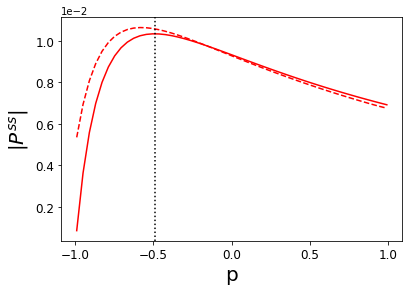

In [114]:
fig1 = plt.plot(p_values,power_data1, color = 'red')
fig2 = plt.plot(p_values, power_data2, color = 'red', ls = '--')
plt.xlabel('p', size = 20)
plt.ylabel('$|P^{ss}|$',size = 20)
plt.xticks([-1,-0.5,0,0.5,1],size = 12)
plt.yticks(size = 12)
plt.axvline(x = p_opt, color= 'black', ls = 'dotted')
plt.tight_layout()
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.show([fig1,fig2])
#plt.savefig('power_vs_p.pdf')

In [116]:
power_data1 = [powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0,0,0.05), 1,3,0,0.05) for p in p_values]
power_data2 = [powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0.1,0,0.05), 1,3,0.1,0.05) for p in p_values]

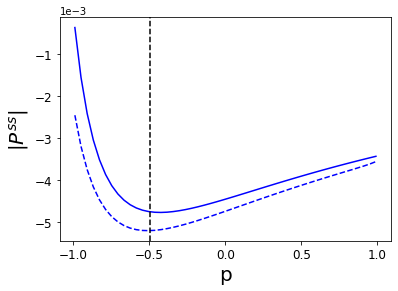

In [117]:
fig1 = plt.plot(p_values,power_data1, color = 'blue')
fig2 = plt.plot(p_values, power_data2, color = 'blue',ls = '--')
plt.xlabel('p', size = 20)
plt.ylabel('$|P^{ss}|$',size = 20)
plt.xticks([-1,-0.5,0,0.5,1],size = 12)
plt.yticks(size = 12)
plt.axvline(x = p_opt, color= 'black', ls = '--')
plt.tight_layout()
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.show([fig1,fig2])

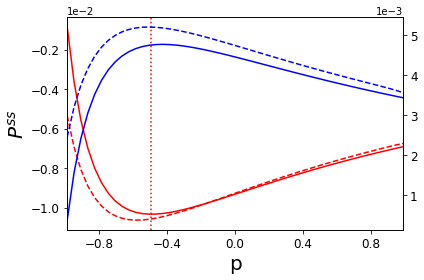

In [7]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('p',size = 20)
ax1.set_ylabel('$P^{ss}$', size = 20)
ax1.plot(p_values, power_data_eng1, color = 'red')
ax1.plot(p_values, power_data_eng2, color = 'red', ls = '--')
ax1.margins(x=0)
ax1.ticklabel_format(axis = 'y', scilimits=[0,0])
ax1.axvline(x = p_opt, color= 'red', ls = 'dotted')
ax1.set_xticks([-0.8,-0.4,0,0.4,0.8])
ax1.tick_params(axis='both', which='major', labelsize=12)
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
ax2.plot(p_values, power_data_ref1, color = 'blue')
ax2.plot(p_values, power_data_ref2, color = 'blue', ls = '--')
ax2.ticklabel_format(axis = 'y', scilimits=[0,0])
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('power_vs_p.pdf')

## Efficiency

In [8]:
gap = np.linspace(0,0.1)
power_data_eng =  [powerSS(getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,0],[0,1]]),g,0,0.05), 1,3,g,0.05) for g in gap]
heat_data_eng =[hotbath_heatCurrentSS(getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,0],[0,1]]),g,0,0.05),3,0.1,2,np.array([[1,0],[0,1]]), g) for g in gap]
power_data_ref =  [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,0.5],[0.5,1]]),g,0,0.05), 1,3,g,0.05) for g in gap]
heat_data_ref =[coldbath_heatCurrentSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,0],[0,1]]),g,0,0.05),1,0.1,1) for g in gap]
efficiency_eng = [power_data_eng[i]/heat_data_eng[i] for i in range(len(gap))]
efficiency_ref = [heat_data_ref[i]/power_data_ref[i] for i in range(len(gap))]

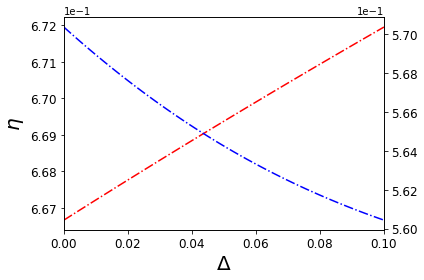

In [9]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('$\Delta$',size = 20)
ax1.set_ylabel('$\eta$', size = 20)
ax1.plot(gap, efficiency_eng, color = 'red', ls = '-.')
ax1.margins(x=0)
ax1.ticklabel_format(axis = 'y', scilimits=[0,0])
ax1.tick_params(axis='both', which='major', labelsize=12)
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
ax2.plot(gap, efficiency_ref, color = 'blue',ls = '-.')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.tight_layout()
plt.savefig('efficiency_vs_gap.pdf')

In [158]:
gap = np.linspace(0,0.1)
power_data =  [-powerSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,0.5],[0.5,1]]),g,0,0.05), 1,3,g,0.05) for g in gap]
heat_data =[coldbath_heatCurrentSS(getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,0],[0,1]]),g,0,0.05),1,0.1,1) for g in gap]
efficiency_data = [heat_data[i]/power_data[i] for i in range(len(gap))]

C:\Users\taufi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


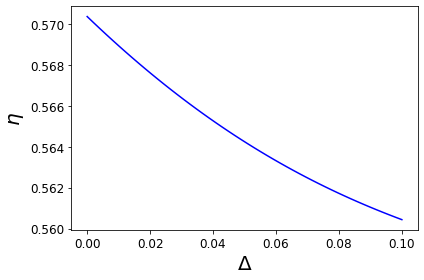

In [159]:
plt.plot(gap,efficiency_data, color = 'blue')
plt.xlabel('$\Delta$', size = 20)
plt.ylabel('$\eta$',size = 20)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.tight_layout()

## Coherent vs Incoherent Heat

In [195]:
p_values = np.linspace(-0.8,0.8)
coh_heat_data =[hotbath_coh_heatCurrentSS(
    getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,p],[p,1]]),0,0,0.05),3,0.1,2,np.array([[1,p],[p,1]]),0) 
            for p in p_values]
incoh_heat_data = [hotbath_incoh_heatCurrentSS(
    getSteadyState(4,1,3,0.1,0.1,2,0.2,np.array([[1,p],[p,1]]),0,0,0.05),3,0.1,2,np.array([[1,p],[p,1]]),0) 
            for p in p_values]
total_heat_data = [coh_heat_data[i]+incoh_heat_data[i] for i in range(len(p_values))]

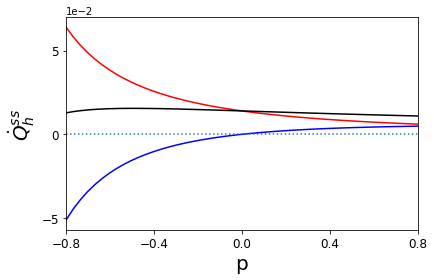

In [197]:
fig1 = plt.plot(p_values,coh_heat_data, color = 'blue')
fig2 = plt.plot(p_values,incoh_heat_data, color = 'red')
fig3 = plt.plot(p_values,total_heat_data, color = 'black')
plt.xlabel('p', size = 20)
plt.ylabel('$\dot{Q}_{h}^{ss}$',size = 20)
plt.xticks([-0.8,-0.4,0,0.4,0.8],size = 12)
plt.yticks([0.05,0,-0.05],size = 12)
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.axhline(y = 0, ls = 'dotted')
plt.tight_layout()
plt.margins(x=0)
plt.savefig("heatflow.pdf")
plt.show([fig1,fig2,fig3])


In [171]:
p_values = np.linspace(-0.8,0.8)
coh_heat_data =[hotbath_coh_heatCurrentSS(
    getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0,0,0.05),3,0.1,2,np.array([[1,p],[p,1]]),0) 
            for p in p_values]
incoh_heat_data = [hotbath_incoh_heatCurrentSS(
    getSteadyState(4,1,3,0.1,0.1,2,1,np.array([[1,p],[p,1]]),0,0,0.05),3,0.1,2,np.array([[1,p],[p,1]]),0) 
            for p in p_values]
total_heat_data = [coh_heat_data[i]+incoh_heat_data[i] for i in range(len(p_values))]

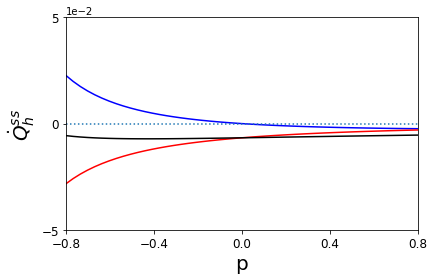

In [172]:
fig1 = plt.plot(p_values,coh_heat_data, color = 'blue')
fig2 = plt.plot(p_values,incoh_heat_data, color = 'red')
fig3 = plt.plot(p_values,total_heat_data, color = 'black')
plt.xlabel('p', size = 20)
plt.ylabel('$\dot{Q}_{h}^{ss}$',size = 20)
plt.xticks([-0.8,-0.4,0,0.4,0.8],size = 12)
plt.yticks([0.05,0,-0.05],size = 12)
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.axhline(y = 0, ls = 'dotted')
plt.tight_layout()
plt.margins(x=0)
plt.show([fig1,fig2,fig3])

In [184]:
p_values = np.linspace(-0.99,0.99)
Th = 2
Tc = 0.2
entropy_prod_coh_dat =[]
entropy_prod_incoh_dat =[]
entropy_prod_tot_dat =[]
for i in range(len(p_values)):
    pmatrix = np.array([[1,p_values[i]],[p_values[i],1]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)
    coh_entropy_prod = -hotbath_coh_heatCurrentSS(ss, 3, 0.1,2,pmatrix,0)/Th
    incoh_entropy_prod=-hotbath_incoh_heatCurrentSS(ss, 3, 0.1,2,pmatrix,0)/Th-coldbath_heatCurrentSS(ss, 1, 0.1,0.2)/Tc
    tot_entropy_prod = coh_entropy_prod + incoh_entropy_prod
    entropy_prod_coh_dat.append(coh_entropy_prod)
    entropy_prod_incoh_dat.append(incoh_entropy_prod)
    entropy_prod_tot_dat.append(tot_entropy_prod)

C:\Users\taufi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\taufi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


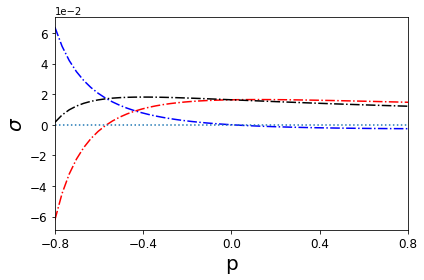

In [199]:
fig1 = plt.plot(p_values,entropy_prod_coh, color = 'blue',ls = '-.')
fig2 = plt.plot(p_values,entropy_prod_incoh, color = 'red',ls = '-.')
fig3 = plt.plot(p_values,entropy_prod_tot, color = 'black',ls = '-.')
plt.xlabel('p', size = 20)
plt.ylabel('$\sigma$',size = 20)
plt.xticks([-0.8,-0.4,0,0.4,0.8],size = 12)
plt.yticks(size = 12)
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.axhline(y = 0, ls = 'dotted')
plt.margins(x=0)
plt.tight_layout()
plt.savefig('entropy_prod.pdf')
plt.show([fig1,fig2,fig3])

In [53]:
p_values = np.linspace(-0.99,0.99)
Th = 2
Tc = 0.2
entropy_prod_data_incoh =[]
for i in range(len(p_values)):
    pmatrix = np.array([[1,p_values[i]],[p_values[i],1]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)
    entropy_prod_data_incoh.append(-hotbath_incoh_heatCurrentSS(ss, 3, 0.1,2,pmatrix,0)/Th)

In [185]:
p_values = np.linspace(-0.99,0.99)
Th = 2
Tc = 0.2
entropy_prod_coh_dat =[]
entropy_prod_incoh_dat =[]
entropy_prod_tot_dat =[]
for i in range(len(p_values)):
    pmatrix = np.array([[1,p_values[i]],[p_values[i],1]])
    ss = getSteadyState(4,1,3,0.1,0.1,2,1,pmatrix,0,0,0.05)
    coh_entropy_prod = -hotbath_coh_heatCurrentSS(ss, 3, 0.1,2,pmatrix,0)/Th
    incoh_entropy_prod=-hotbath_incoh_heatCurrentSS(ss, 3, 0.1,2,pmatrix,0)/Th-coldbath_heatCurrentSS(ss, 1, 0.1,1)/Tc
    tot_entropy_prod = coh_entropy_prod + incoh_entropy_prod
    entropy_prod_coh_dat.append(coh_entropy_prod)
    entropy_prod_incoh_dat.append(incoh_entropy_prod)
    entropy_prod_tot_dat.append(tot_entropy_prod)

C:\Users\taufi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\taufi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


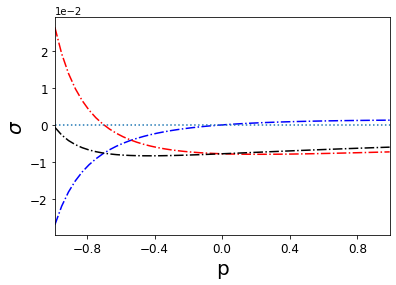

In [186]:
fig1 = plt.plot(p_values,entropy_prod_coh_dat, color = 'blue',ls = '-.')
fig2 = plt.plot(p_values,entropy_prod_incoh_dat, color = 'red',ls = '-.')
fig3 = plt.plot(p_values,entropy_prod_tot_dat, color = 'black',ls = '-.')
plt.xlabel('p', size = 20)
plt.ylabel('$\sigma$',size = 20)
plt.xticks([-0.8,-0.4,0,0.4,0.8],size = 12)
plt.yticks(size = 12)
plt.ticklabel_format(axis = 'y', scilimits=[0,0])
plt.axhline(y = 0, ls = 'dotted')
plt.margins(x=0)
plt.show([fig1,fig2,fig3])

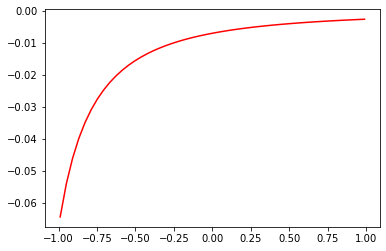

In [55]:
plt.plot(p_values,entropy_prod_data_incoh, color = 'red')

In [154]:
(0.01/0.57)*100

1.754385964912281

In [161]:
(6.72-6.67)*100/(6.72)

0.7440476190476164